<a href="https://colab.research.google.com/github/ektaatomar/Identify-income-bracket-based-on-demographics/blob/master/Classification_problem_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
#read directly from the link
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

#data doesn't have column names in file 
df.columns= ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country','income']

#print(df.describe())

count_class_0, count_class_1 = df.income.value_counts()

print(df.head())

print(df.isnull().values.any())



   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             0             0              13   United-States   <=50

Part of a different approach. - In case we have to remove missing value or the see how much missing values are there for how many columns. We dont require it here as the models seem to work pretty good with label encoder.

In [0]:
#df.where(df['workclass']!='?')
#df.info
#is_2002 =  df[df['workclass'].str!=' ?']
#print(is_2002)
#df.astype(str)
#print(df['native-country'].unique())
#df_copy=df.where(df['workclass']==' ?')
#print(df_copy)
#df['age'].where(df['age'].astype(str)==' ?').count()
#df['occupation'].where(df['occupation']==' ?').count()
#df.where(df['native-country']==' ?')


# Divide by class
'''
df_class_0 = df[df['income'] == ' <=50K']
df_class_1 = df[df['income'] == ' >50K']
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.income.value_counts())

df_test_over.income.value_counts().plot(kind='bar', title='Count (income)');'''


'''df_variable = df[['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country']]'''

#df_target=df[['income']]
#print(df_target.head())


#df_variable.describe()
#imputed_matrix= KNN(k=3).fit_transform(df_variable)
#imputed_df= pd.DataFrame(imputed_matrix, columns = df.columns)
#imputed_df

"df_variable = df[['age',\n'workclass',\n'fnlwgt',\n'education',\n'education-num',\n'marital-status',\n'occupation',\n'relationship',\n'race',\n'sex',\n'capital-gain',\n'capital-loss',\n'hours-per-week',\n'native-country']]"

In [0]:

from sklearn.preprocessing import LabelEncoder
Lencoder= LabelEncoder()
df=df.apply(Lencoder.fit_transform)
df_target=df[['income']]
df_features = df[['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country']]
print(df_target.head())

#df_features = pd.get_dummies(df_variable, drop_first = True) 
#df_features=df_variable.apply(Lencoder.fit_transform)
#df_features.head()

   income
0       0
1       0
2       0
3       0
4       0


DecisionTreeClassifier 

Accuracy on training set: 0.867
Accuracy on test set: 0.859
Feature importances:
[0.06490976 0.00827105 0.01739708 0.00040847 0.16196962 0.00163389
 0.02470986 0.38404068 0.00339902 0.00269081 0.21639281 0.06284166
 0.04742714 0.00390815]
The confusion matrix is:
 [[4598  359]
 [ 556  999]]


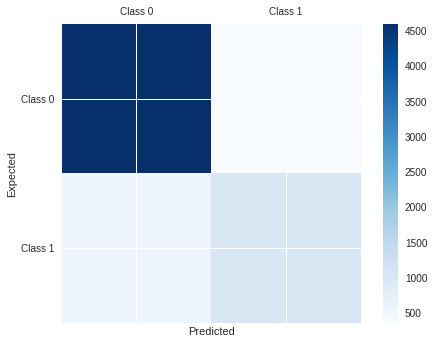

Accuracy score: 0.859
f1_score: 0.856
precision_score: 0.855
recall_score: 0.859
classification_report:
             precision    recall  f1-score   support

      <=50k       0.89      0.93      0.91      4957
       >50k       0.74      0.64      0.69      1555

avg / total       0.85      0.86      0.86      6512

(6512, 1)
AUC =  0.49294268035815086


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, classification_report, auc,precision_recall_curve

x_train,x_test,y_train,y_test = train_test_split(df_features,df_target, test_size = 0.20, random_state = 0)
tree=DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree.fit(x_train,y_train)
predictions=tree.predict(x_test)
print("DecisionTreeClassifier \n")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))
print("Feature importances:\n{}".format(tree.feature_importances_))
print("The confusion matrix is:\n", confusion_matrix(y_test,predictions))
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,predictions), cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

print("Accuracy score: {:.3f}".format(accuracy_score(y_test,predictions)))
print("f1_score: {:.3f}".format(f1_score(y_test,predictions,average = "weighted")))
print("precision_score: {:.3f}".format(precision_score(y_test,predictions,average = "weighted")))
print("recall_score: {:.3f}".format(recall_score(y_test,predictions,average = "weighted")))
print("classification_report:\n{}".format(classification_report(y_test,predictions, target_names=['<=50k','>50k'])))




print(y_test.shape)
#new_data=y_test['income'].reshape(6512,)
#print(new_data)
#print(new_data.shape)
#print(predictions.shape)

FPR, TPR, thresholds = precision_recall_curve(y_test, predictions, pos_label =1)
print("AUC = ",auc(FPR, TPR))







In [0]:
from sklearn.cross_validation import KFold, cross_val_score
cv_folds = KFold(n=df.shape[0], n_folds = 5, random_state = 42)
cv_score = cross_val_score(tree, df_features, df_target, cv = cv_folds)
print("{} +/- {:.2f}".format(cv_score.mean(),cv_score.std() / 2))



/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.8522727272727273 +/- 0.00


In [0]:
#import sys
#!{sys.executable} -m pip install sklearn

'''from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(x_train)
print(pca.n_components_)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)'''

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,criterion='entropy', random_state = 42, n_jobs =-1)

rf_model=rf.fit(x_train,y_train)
predictions=rf_model.predict(x_test)
print("RandomForestClassifier")
print("Accuracy on training set: {:.3f}".format(rf_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(x_test, y_test)))
print("Feature importances:\n{}".format(rf_model.feature_importances_))
print("f1_score: {:.3f}".format(f1_score(y_test,predictions,average = "weighted")))
print("precision_score: {:.3f}".format(precision_score(y_test,predictions,average = "weighted")))
print("recall_score: {:.3f}".format(recall_score(y_test,predictions,average = "weighted")))
print("classification_report:\n {}".format(classification_report(y_test,predictions, target_names=['<=50k','>50k'])))
FPR, TPR, thresholds = precision_recall_curve(y_test, predictions, pos_label =1)
print("AUC = ",auc(FPR, TPR))






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier
Accuracy on training set: 1.000
Accuracy on test set: 0.858
Feature importances:
[0.15949781 0.04012221 0.17017344 0.03479404 0.07864075 0.0812495
 0.06871847 0.09885796 0.01491441 0.01319362 0.10445289 0.03223744
 0.08533917 0.01780831]
f1_score: 0.853
precision_score: 0.852
recall_score: 0.858
classification_report:
              precision    recall  f1-score   support

      <=50k       0.89      0.93      0.91      4957
       >50k       0.74      0.62      0.68      1555

avg / total       0.85      0.86      0.85      6512

AUC =  0.4875653128630723


In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter =100000,activation = 'relu',random_state=42, alpha=0.00000001)
mlp.fit(x_train, y_train)
predictions=mlp.predict(x_test)

print("MLPClassifier \n")
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))
print("f1_score: {:.3f}".format(f1_score(y_test,predictions,average = "weighted")))
print("precision_score: {:.3f}".format(precision_score(y_test,predictions,average = "weighted")))
print("recall_score: {:.3f}".format(recall_score(y_test,predictions,average = "weighted")))
print("classification_report:\n {}".format(classification_report(y_test,predictions, target_names=['<=50k','>50k'])))
FPR, TPR, thresholds = precision_recall_curve(y_test, predictions, pos_label =1)
print("AUC = ",auc(FPR, TPR))


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier 

Accuracy on training set: 0.81
Accuracy on test set: 0.80
f1_score: 0.772
precision_score: 0.785
recall_score: 0.802
classification_report:
              precision    recall  f1-score   support

      <=50k       0.82      0.96      0.88      4957
       >50k       0.69      0.31      0.43      1555

avg / total       0.78      0.80      0.77      6512

AUC =  0.3424236911061186


In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(lr, 1)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
print("Features sorted by their rank:")
feature_rank=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df_features.columns))
print(feature_rank[:12])
names=[]
for rank, name in feature_rank[:13]:
  names.append(name)
lg1 = LogisticRegression(C=1000000).fit(x_train[names], y_train)
predictions=lg1.predict(x_test[names])

print("LogisticRegression with recursive feature elimination \n")
print("Training Accuracy: {}".format(lg1.score(x_train[names], y_train)))
print("Test Accuracy: {}".format(lg1.score(x_test[names], y_test)))
print("f1_score: {:.3f}".format(f1_score(y_test,predictions,average = "weighted")))
print("precision_score: {:.3f}".format(precision_score(y_test,predictions,average = "weighted")))
print("recall_score: {:.3f}".format(recall_score(y_test,predictions,average = "weighted")))
print("classification_report:\n {}".format(classification_report(y_test,predictions, target_names=['<=50k','>50k'])))
FPR, TPR, thresholds = precision_recall_curve(y_test, predictions, pos_label =1)
print("AUC = ",auc(FPR, TPR))
print("\n LogisticRegression without recursive feature elimination \n")
lg2 = LogisticRegression().fit(x_train, y_train)
print("Training Accuracy: {}".format(lg2.score(x_train, y_train)))
print("Test Accuracy: {}".format(lg2.score(x_test, y_test)))




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False  True False False
 False False]
[ 6 10 14 11  2  3 12  4  5  1  9  8  7 13]
Features sorted by their rank:
[(1, 'sex'), (2, 'education-num'), (3, 'marital-status'), (4, 'relationship'), (5, 'race'), (6, 'age'), (7, 'hours-per-week'), (8, 'capital-loss'), (9, 'capital-gain'), (10, 'workclass'), (11, 'education'), (12, 'occupation')]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression with recursive feature elimination 

Training Accuracy: 0.8240939803439803
Test Accuracy: 0.8220208845208845
f1_score: 0.806
precision_score: 0.810
recall_score: 0.822
classification_report:
              precision    recall  f1-score   support

      <=50k       0.84      0.94      0.89      4957
       >50k       0.71      0.44      0.54      1555

avg / total       0.81      0.82      0.81      6512

AUC =  0.3997403477643068

 LogisticRegression without recursive feature elimination 

Training Accuracy: 0.8067030098280098
Test Accuracy: 0.8060503685503686


In [0]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train[names], y_train)
predictions=clf.predict(x_test[names])
print("svm  \n")
print("Training Accuracy: {}".format(clf.score(x_train[names], y_train)))
print("Test Accuracy: {}".format(clf.score(x_test[names], y_test)))
print("f1_score: {:.3f}".format(f1_score(y_test,predictions,average = "weighted")))
print("precision_score: {:.3f}".format(precision_score(y_test,predictions,average = "weighted")))
print("recall_score: {:.3f}".format(recall_score(y_test,predictions,average = "weighted")))
print("classification_report:\n {}".format(classification_report(y_test,predictions, target_names=['<=50k','>50k'])))
FPR, TPR, thresholds = precision_recall_curve(y_test, predictions, pos_label =1)
print("AUC = ",auc(FPR, TPR))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm  

Training Accuracy: 0.9197635135135135
Test Accuracy: 0.8195638820638821
f1_score: 0.798
precision_score: 0.808
recall_score: 0.820
classification_report:
              precision    recall  f1-score   support

      <=50k       0.83      0.95      0.89      4957
       >50k       0.73      0.39      0.51      1555

avg / total       0.81      0.82      0.80      6512

AUC =  0.39314392753551314
